In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<h2>Preparing and performing EDA on the train data<h2>

In [50]:
train_data = pd.read_csv('data_train.csv')
train = train_data.drop(columns=['Id'])

In [51]:
print(train.info()) # Check column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHlth               202944 non-null  int64
 14  MentHlth              202944 non-null  int64
 15  PhysHlth              202944 non-n

In [52]:
print(train.describe()) # Summary statistics

              HighBP       HighChol      CholCheck            BMI  \
count  202944.000000  202944.000000  202944.000000  202944.000000   
mean        0.428700       0.424344       0.962655      28.379824   
std         0.494891       0.494244       0.189607       6.612738   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  202944.000000  202944.000000         202944.000000  202944.000000   
mean        0.442634       0.040844              0.094391       0.756302   
std         0.496700       0.197929              0.292372       0.429313   
min         0.000000       0.000000              0.000000       0.000000  

### Check for null values

In [53]:
train.isna().sum() #Check for null

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

### Check for duplicate

In [54]:
train.loc[train.duplicated()] # search for duplicate

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
20272,0,0,1,23,0,0,0,1,1,1,...,0,0,0,0,9,6,8,0,0,0
22582,0,0,1,26,0,0,0,1,1,1,...,0,0,0,1,5,6,8,0,0,0
23322,0,0,1,22,0,0,0,1,1,1,...,0,0,0,0,3,6,8,0,0,0
23790,0,1,1,24,0,0,0,1,1,1,...,0,0,0,1,9,6,8,0,0,0
25615,0,0,1,23,0,0,0,1,1,1,...,0,0,0,0,6,6,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200484,0,0,1,22,0,0,0,0,0,1,...,0,0,0,0,7,6,8,0,0,0
200534,0,1,1,22,0,0,0,1,0,1,...,0,0,0,0,10,5,7,0,0,0
201186,0,0,1,23,0,0,0,1,1,1,...,0,0,0,1,5,6,8,0,0,0
201546,0,0,1,27,1,0,0,1,1,1,...,0,0,0,0,7,6,8,0,0,0


In [55]:
# There are duplcates so they must be deleted
train.drop_duplicates(inplace=True)
train.loc[train.duplicated()]

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status


 no more duplicate

### Outliers handler proccess, exclude all binary and clasification features

In [56]:
train[['BMI', 'MentHlth', 'PhysHlth', 'ExtraMedTest', 'ExtraAlcoholTest']].describe() # Before outliers handler

,BMI,MentHlth,PhysHlth,ExtraMedTest,ExtraAlcoholTest
count,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000
mean,28.383844,3.200251,4.260782,-7.416438,-7.566027
std,6.614264,7.430349,8.740095,76.031037,75.964939
min,12.000000,0.000000,0.000000,-199.000000,-199.000000
25%,24.000000,0.000000,0.000000,-55.000000,-55.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000,40.000000,40.000000
max,98.000000,30.000000,30.000000,199.000000,199.000000


In [57]:
# Outliers check: BMI, MentHlth, PhysHlth, ExtraMedTest, ExtraAlcoholTest
for i in ['BMI', 'MentHlth', 'PhysHlth', 'ExtraMedTest', 'ExtraAlcoholTest']:
    Q1 = train[i].quantile(0.25)
    Q3 = train[i].quantile(0.75)
    IQR = Q3 - Q1
    min_cap = Q1 - 1.5 * IQR
    max_cap = Q3 + 1.5 * IQR
    train[i] = train[i].clip(min_cap, max_cap)

In [58]:
train[['BMI', 'MentHlth', 'PhysHlth', 'ExtraMedTest', 'ExtraAlcoholTest']].describe() # After outliers handler

,BMI,MentHlth,PhysHlth,ExtraMedTest,ExtraAlcoholTest
count,202736.000000,202736.000000,202736.000000,202736.000000,202736.000000
mean,28.107911,1.180540,1.855692,-7.478637,-7.625446
std,5.563345,1.956936,2.890768,75.859425,75.801322
min,13.500000,0.000000,0.000000,-197.500000,-197.500000
25%,24.000000,0.000000,0.000000,-55.000000,-55.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000,40.000000,40.000000
max,41.500000,5.000000,7.500000,182.500000,182.500000


The outliers applied successfully

### Distribution of Feature

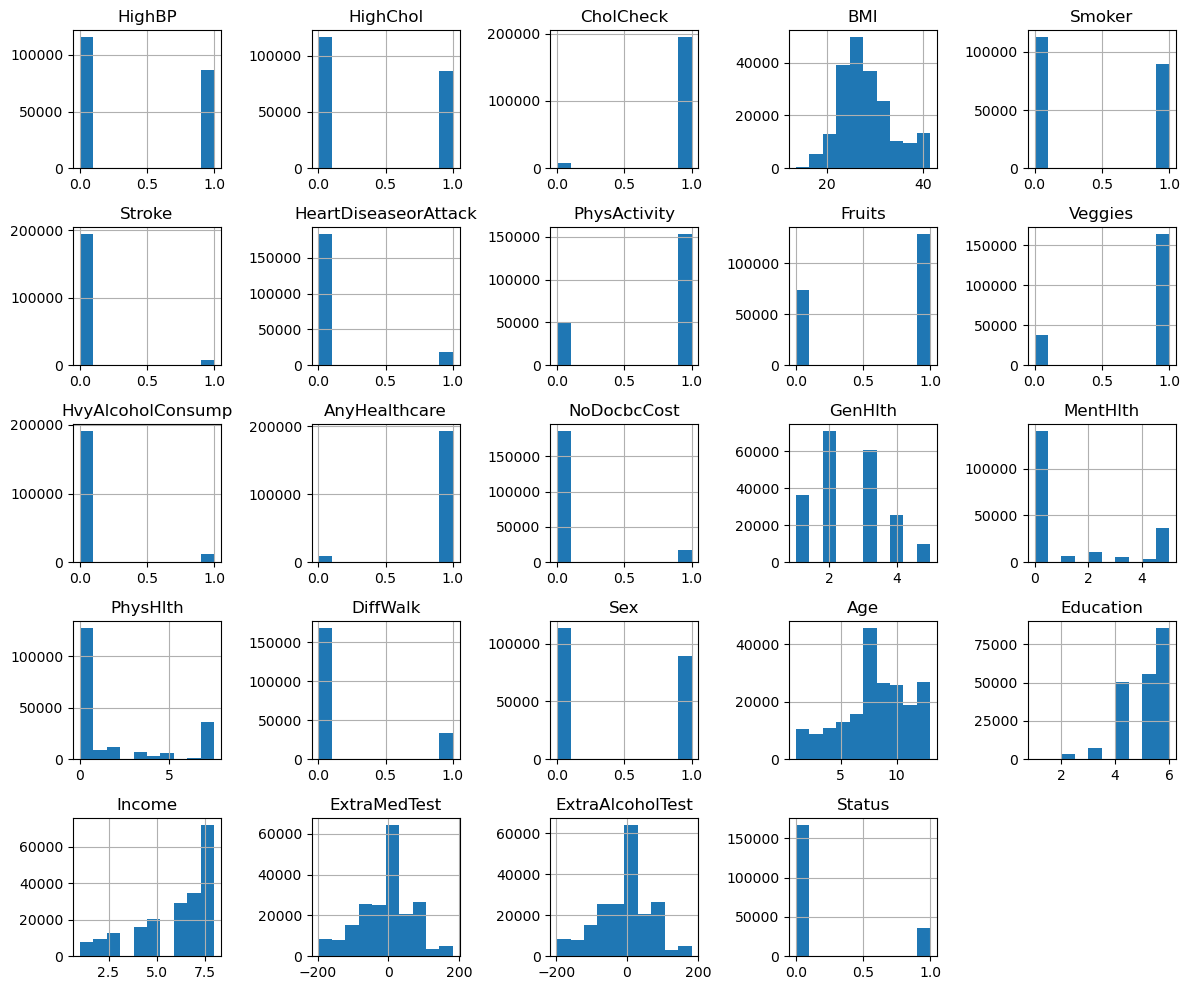

In [59]:
# Plot histograms for distribution of features
train.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### Correlations

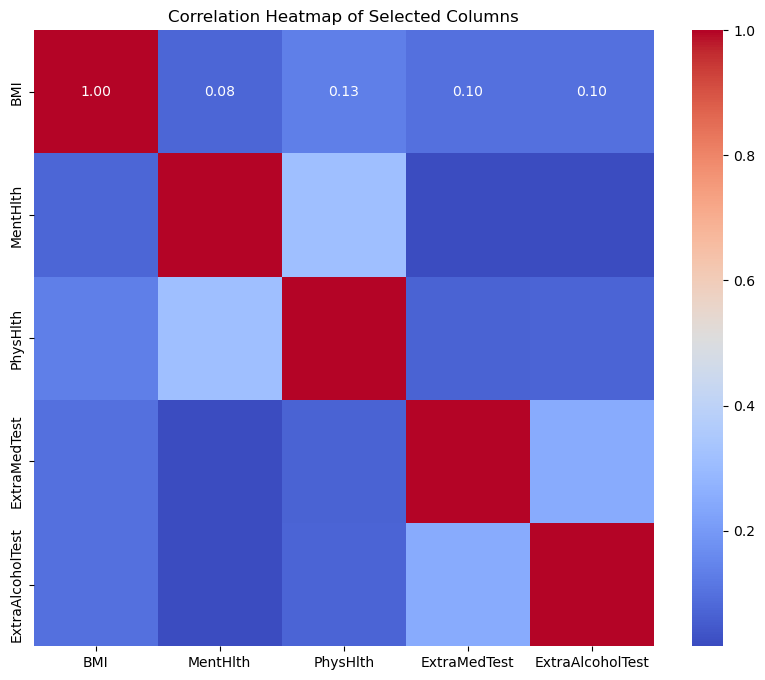

In [60]:
# Visualize correlations between numerical features
# Compute the correlation matrix for the selected columns
correlation_matrix = train[['BMI', 'MentHlth', 'PhysHlth','ExtraMedTest', 'ExtraAlcoholTest']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Selected Columns")
plt.show()

<h2>Split into input & output<h2>

In [61]:
X = train.drop(columns=['Status'])
y = train['Status']

<h2>Prepare the test set<h2>

In [62]:
test_data = pd.read_csv('data_test.csv')
X_test = test_data.drop(columns=['Id','Status'])
X_test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
0,1,1,1,30,1,0,1,1,1,1,...,2,3,0,0,1,11,4,7,0,-145
1,0,0,1,27,1,0,0,0,0,1,...,1,0,30,1,1,13,2,5,28,-145
2,0,0,1,21,0,0,0,1,1,1,...,3,0,5,0,0,10,6,8,-26,72
3,0,0,1,24,1,0,0,1,1,1,...,4,0,30,0,0,9,6,7,0,0
4,1,0,1,34,0,0,0,1,1,0,...,4,0,1,1,0,11,4,7,-73,-63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50731,1,0,1,38,0,0,0,1,1,0,...,2,2,2,0,0,8,6,7,43,22
50732,0,1,1,24,0,0,0,1,0,1,...,3,25,0,0,0,10,6,7,-6,-67
50733,1,1,1,31,0,0,1,1,1,1,...,4,0,0,1,0,13,5,3,34,100
50734,1,1,1,24,1,0,0,0,0,1,...,3,0,0,1,1,11,5,7,189,100


<h2>Create train and validate data<h2>

In [63]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (train 80%, test 20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
84835,0,0,1,23.0,0,0,0,1,1,1,...,3,5,3.0,0,0,6,6,8,0.0,-48.0
106099,1,0,1,29.0,0,0,0,1,1,1,...,2,0,0.0,0,1,4,6,8,1.0,-104.0
137186,0,0,1,39.0,0,0,0,1,1,1,...,3,0,0.0,1,0,5,5,5,0.0,0.0
61833,0,0,1,28.0,0,0,0,1,1,1,...,2,0,0.0,0,1,4,6,7,0.0,21.0
197480,0,1,1,35.0,1,0,0,1,1,1,...,2,5,7.5,0,0,6,5,7,-93.0,-92.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119949,0,1,1,29.0,1,0,1,0,0,1,...,4,0,0.0,0,1,11,6,4,100.0,100.0
103748,0,1,1,30.0,0,1,0,1,0,1,...,5,0,7.5,1,1,8,6,8,97.0,67.0
132016,0,0,1,22.0,1,0,0,1,1,1,...,1,0,0.0,0,1,3,6,6,18.0,0.0
146978,0,0,1,23.0,1,0,0,1,1,1,...,2,2,0.0,0,0,8,6,8,-86.0,-9.0


In [65]:
X_val

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
162537,0,0,1,41.5,1,0,0,1,1,1,...,2,0,0.0,0,1,7,5,8,-83.0,-73.0
67097,1,1,1,22.0,1,0,0,1,1,1,...,2,0,0.0,0,0,10,6,7,-114.0,-117.0
191207,0,1,1,27.0,0,0,0,1,1,0,...,3,0,1.0,0,1,13,6,5,0.0,18.0
153226,0,0,1,21.0,0,0,0,1,0,1,...,1,0,0.0,0,1,7,6,8,-47.0,0.0
100456,1,0,1,27.0,0,0,0,1,1,1,...,1,0,0.0,0,1,8,6,7,-41.0,93.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87823,0,0,1,28.0,1,0,0,0,0,1,...,3,0,7.5,0,1,4,5,4,100.0,62.0
33587,0,0,1,27.0,0,0,0,1,1,0,...,1,0,0.0,0,1,8,3,5,-181.0,-58.0
120710,1,1,1,32.0,0,0,0,1,1,1,...,3,0,0.0,0,0,10,4,8,100.0,92.0
164391,1,0,1,28.0,1,0,0,0,0,0,...,2,0,0.0,0,1,7,2,6,0.0,-31.0


In [66]:
y_train.info()
y_val.info()

<class 'pandas.core.series.Series'>
Index: 162188 entries, 84835 to 122031
Series name: Status
Non-Null Count   Dtype
--------------   -----
162188 non-null  int64
dtypes: int64(1)
memory usage: 2.5 MB
<class 'pandas.core.series.Series'>
Index: 40548 entries, 162537 to 99733
Series name: Status
Non-Null Count  Dtype
--------------  -----
40548 non-null  int64
dtypes: int64(1)
memory usage: 633.6 KB


<h2>Import evalutaion libraries<h2>

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
import joblib

<h2>Decision Trees<h2>

<h4>Hold-out method for Decision Tree model<h4>

In [68]:
from sklearn.tree import DecisionTreeClassifier

# Train model
tree_model = DecisionTreeClassifier(max_depth = 30, 
                                    min_samples_split=200, 
                                    min_samples_leaf=200, 
                                    criterion = 'entropy', 
                                    random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_val)

In [69]:
y_pred_tree[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<h4>Validate Hold-out Model<h4>

In [70]:
print('Accuracy score: %.2f' % accuracy_score(y_val, y_pred_tree))
print('Precision score: %.2f' % precision_score(y_val, y_pred_tree))
print('Recall score: %.2f' % recall_score(y_val, y_pred_tree))
print('F1 score: %.2f' % f1_score(y_val, y_pred_tree))

Accuracy score: 0.96
Precision score: 0.95
Recall score: 0.80
F1 score: 0.87


In [71]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_tree))

Confusion Matrix:
[[33208   276]
 [ 1415  5649]]


<h4>KFold method for Decision Tree model<h4>

In [72]:
folds = 5  # Define the number of folds for K-fold cross-validation

kf = KFold(n_splits=folds, shuffle=True, random_state=42)  # Initialize the KFold object

for train_index, test_index in kf.split(X_train):
    # Split the dataset into training and testing sets for this fold
    X_tree_train_fold, X_tree_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_tree_train_fold, y_tree_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        
    # Define the model
    tree_model_fold = DecisionTreeClassifier(max_depth = 30, min_samples_split=200, min_samples_leaf=200, criterion = 'entropy')

    # Train the model on the training data
    tree_model_fold.fit(X_tree_train_fold, y_tree_train_fold)

    # Make predictions on the test data
    y_tree_pred_fold = tree_model_fold.predict(X_tree_test_fold)

    # Calculate score for this fold
    print('Accuracy score: %.2f' % accuracy_score(y_tree_test_fold, y_tree_pred_fold))
    print('Precision score: %.2f' % precision_score(y_tree_test_fold, y_tree_pred_fold))
    print('Recall score: %.2f' % recall_score(y_tree_test_fold, y_tree_pred_fold))
    print('F1 score: %.2f' % f1_score(y_tree_test_fold, y_tree_pred_fold))
    print("\n")

Accuracy score: 0.96
Precision score: 0.96
Recall score: 0.81
F1 score: 0.88


Accuracy score: 0.96
Precision score: 0.95
Recall score: 0.80
F1 score: 0.87


Accuracy score: 0.96
Precision score: 0.97
Recall score: 0.80
F1 score: 0.88


Accuracy score: 0.96
Precision score: 0.96
Recall score: 0.80
F1 score: 0.87


Accuracy score: 0.96
Precision score: 0.95
Recall score: 0.80
F1 score: 0.87




In [73]:
tree_model_fold.fit(X_train, y_train)

y_pred_tree_model_fold = tree_model_fold.predict(X_val)

In [74]:
print('Accuracy score: %.2f' % accuracy_score(y_val, y_pred_tree_model_fold))
print('Precision score: %.2f' % precision_score(y_val, y_pred_tree_model_fold))
print('Recall score: %.2f' % recall_score(y_val, y_pred_tree_model_fold))
print('F1 score: %.2f' % f1_score(y_val, y_pred_tree_model_fold))

Accuracy score: 0.96
Precision score: 0.95
Recall score: 0.80
F1 score: 0.87


<h2>Random Forest<h2>

<h4>Hold-out method for Random Forest model<h4>

In [75]:
from sklearn.ensemble import RandomForestClassifier

# Train model
frst_model = RandomForestClassifier(n_estimators=150, 
                                    max_depth=20, 
                                    min_samples_split=150, 
                                    min_samples_leaf=150)
frst_model.fit(X_train, y_train)

y_pred_frst = frst_model.predict(X_val)

In [76]:
y_pred_frst[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

<h4>Validate Hold-out Model<h4>

In [77]:
print('Accuracy score: %.2f' % accuracy_score(y_val, y_pred_frst))
print('Precision score: %.2f' % precision_score(y_val, y_pred_frst))
print('Recall score: %.2f' % recall_score(y_val, y_pred_frst))
print('F1 score: %.2f' % f1_score(y_val, y_pred_frst))

Accuracy score: 0.96
Precision score: 0.99
Recall score: 0.76
F1 score: 0.86


In [78]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_frst))

Confusion Matrix:
[[33439    45]
 [ 1689  5375]]


<h4>KFold method for Random Forest model<h4>

In [79]:
for train_index, test_index in kf.split(X_train):
    # Split the dataset into training and testing sets for this fold
    X_frst_train_fold, X_frst_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_frst_train_fold, y_frst_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    frst_model_fold = RandomForestClassifier(n_estimators=15, max_depth=10, min_samples_split=200, min_samples_leaf=200)
    
    # Train the model on the training data
    frst_model_fold.fit(X_frst_train_fold, y_frst_train_fold)

    # Make predictions on the test data
    y_frst_pred_fold = frst_model_fold.predict(X_frst_test_fold)

    # Calculate score for this fold
    print('Accuracy score: %.2f' % accuracy_score(y_frst_test_fold, y_frst_pred_fold))
    print('Precision score: %.2f' % precision_score(y_frst_test_fold, y_frst_pred_fold))
    print('Recall score: %.2f' % recall_score(y_frst_test_fold, y_frst_pred_fold))
    print('F1 score: %.2f' % f1_score(y_frst_test_fold, y_frst_pred_fold))
    print("\n")

Accuracy score: 0.96
Precision score: 1.00
Recall score: 0.76
F1 score: 0.86


Accuracy score: 0.96
Precision score: 0.99
Recall score: 0.76
F1 score: 0.86


Accuracy score: 0.96
Precision score: 0.99
Recall score: 0.77
F1 score: 0.86


Accuracy score: 0.96
Precision score: 1.00
Recall score: 0.75
F1 score: 0.86


Accuracy score: 0.96
Precision score: 1.00
Recall score: 0.75
F1 score: 0.86




In [80]:
frst_model_fold.fit(X_train, y_train)

y_pred_frst_model_fold = frst_model_fold.predict(X_val)

In [81]:
print('Accuracy score: %.2f' % accuracy_score(y_val, y_pred_frst_model_fold))
print('Precision score: %.2f' % precision_score(y_val, y_pred_frst_model_fold))
print('Recall score: %.2f' % recall_score(y_val, y_pred_frst_model_fold))
print('F1 score: %.2f' % f1_score(y_val, y_pred_frst_model_fold))

Accuracy score: 0.96
Precision score: 1.00
Recall score: 0.75
F1 score: 0.86


<h2>Linear Regression<h2>

<h4>Hold-out method for Linear Regression model<h4>

In [82]:
from sklearn.linear_model import LinearRegression

# Train model
rgs_model = LinearRegression()
rgs_model.fit(X_train, y_train)

y_pred_rgs = rgs_model.predict(X_val)

In [83]:
threshold = 0.5
y_pred_rgs = [1 if pred > threshold else 0 for pred in y_pred_rgs]
y_pred_rgs[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

<h4>Validate Hold-out Model<h4>

In [84]:
print('Accuracy score: %.2f' % accuracy_score(y_val, y_pred_rgs))
print('Precision score: %.2f' % precision_score(y_val, y_pred_rgs))
print('Recall score: %.2f' % recall_score(y_val, y_pred_rgs))
print('F1 score: %.2f' % f1_score(y_val, y_pred_rgs))

Accuracy score: 0.92
Precision score: 0.93
Recall score: 0.60
F1 score: 0.73


In [85]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_rgs))

Confusion Matrix:
[[33147   337]
 [ 2828  4236]]


<h4>KFold method for Linear Regression model<h4>

In [86]:
for train_index, test_index in kf.split(X_train):
    # Split the dataset into training and testing sets for this fold
    X_rgs_train_fold, X_rgs_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_rgs_train_fold, y_rgs_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Define the model
    rgs_model_fold = RandomForestClassifier()

    # Train the model on the training data
    rgs_model_fold.fit(X_rgs_train_fold, y_rgs_train_fold)

    # Make predictions on the test data
    y_rgs_pred_fold = rgs_model_fold.predict(X_rgs_test_fold)
    y_rgs_pred_fold = [1 if pred > threshold else 0 for pred in y_rgs_pred_fold]

    # Calculate score for this fold
    print('Accuracy score: %.2f' % accuracy_score(y_rgs_test_fold, y_rgs_pred_fold))
    print('Precision score: %.2f' % precision_score(y_rgs_test_fold, y_rgs_pred_fold))
    print('Recall score: %.2f' % recall_score(y_rgs_test_fold, y_rgs_pred_fold))
    print('F1 score: %.2f' % f1_score(y_rgs_test_fold, y_rgs_pred_fold))
    print("\n")

Accuracy score: 0.96
Precision score: 0.97
Recall score: 0.79
F1 score: 0.87


Accuracy score: 0.96
Precision score: 0.97
Recall score: 0.79
F1 score: 0.87


Accuracy score: 0.96
Precision score: 0.97
Recall score: 0.79
F1 score: 0.87


Accuracy score: 0.96
Precision score: 0.97
Recall score: 0.79
F1 score: 0.87


Accuracy score: 0.96
Precision score: 0.97
Recall score: 0.79
F1 score: 0.87




In [87]:
rgs_model_fold.fit(X_train, y_train)

y_pred_rgs_model_fold = rgs_model_fold.predict(X_val)

In [88]:
print('Accuracy score: %.2f' % accuracy_score(y_val, y_pred_rgs_model_fold))
print('Precision score: %.2f' % precision_score(y_val, y_pred_rgs_model_fold))
print('Recall score: %.2f' % recall_score(y_val, y_pred_rgs_model_fold))
print('F1 score: %.2f' % f1_score(y_val, y_pred_rgs_model_fold))

Accuracy score: 0.96
Precision score: 0.97
Recall score: 0.79
F1 score: 0.87


<h2>Predict the test set<h2>

In [89]:
# Load the output CSV file
output_test = pd.read_csv('COSC2753_A1_Predictions_s3926387.csv')

# Perform predictions using KFold trained Random Forest model
predictions = frst_model_fold.predict(X_test)

# Write the predictions to the chosen column in the output csv
output_test['Status'] = predictions

# Write the predictions output back to the CSV file
output_test.to_csv('COSC2753_A1_Predictions_s3926387.csv', index=False)

In [90]:
num_predictions = len(predictions)
num_predictions

50736